In [4]:
pip install ultralytics


[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


# Python Dependencies that nessary to install before run the Object Detection

# Below section is used to load the model and image for detection

In [ ]:
!pip install opencv-python-headless

In [5]:
!yolo detect predict model=yolov8n.pt source=Objects/*.*

Ultralytics YOLOv8.0.227 🚀 Python-3.9.16 torch-2.1.2+cu121 CPU (Intel Xeon Platinum 8175M 2.50GHz)
YOLOv8n summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs

image 1/4 /opt/app-root/src/recognition/Objects/000000000183.jpg: 448x640 2 bottles, 1 wine glass, 1 cup, 1 dining table, 260.2ms
image 2/4 /opt/app-root/src/recognition/Objects/000000000448.jpg: 448x640 3 persons, 8 cups, 5 knifes, 4 bowls, 1 sandwich, 5 chairs, 1 potted plant, 1 dining table, 100.2ms
image 3/4 /opt/app-root/src/recognition/Objects/000000000453.jpg: 480x640 9 persons, 1 bus, 1 backpack, 1 baseball glove, 167.0ms
image 4/4 /opt/app-root/src/recognition/Objects/000000000456.jpg: 480x640 5 persons, 1 dog, 1 couch, 97.9ms
Speed: 2.1ms preprocess, 156.3ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict10
💡 Learn more at https://docs.ultralytics.com/modes/predict


### Source=test.jpg For Example: test.jpg is image name which need to be changed for testing new image file.

# Below Section will load the saved image to check the output image. The Path need to be update for loading the input image.
### For example runs/detect/predict or runs/detect/predict1

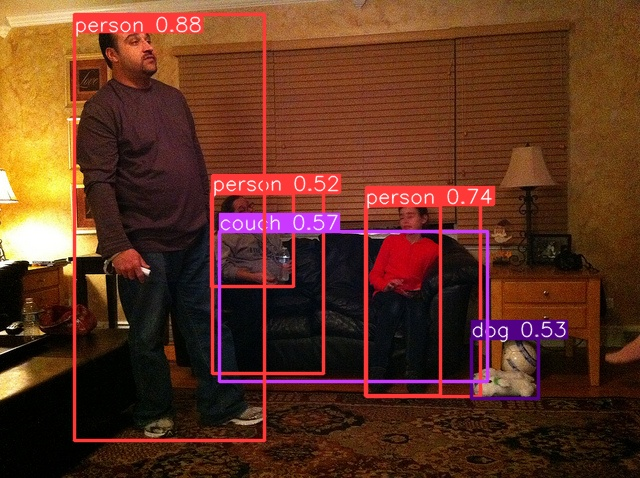

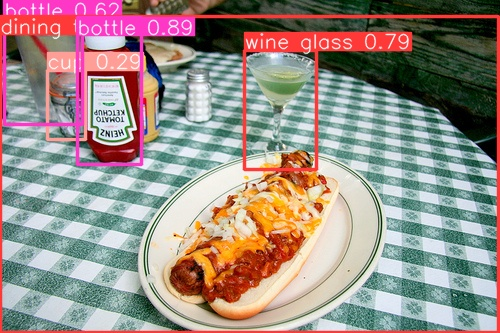

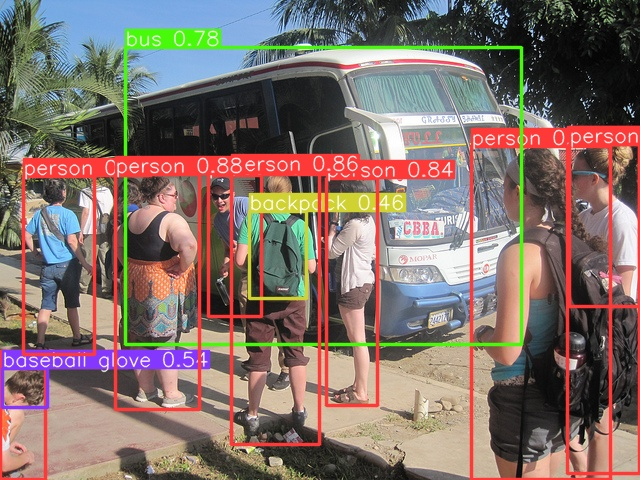

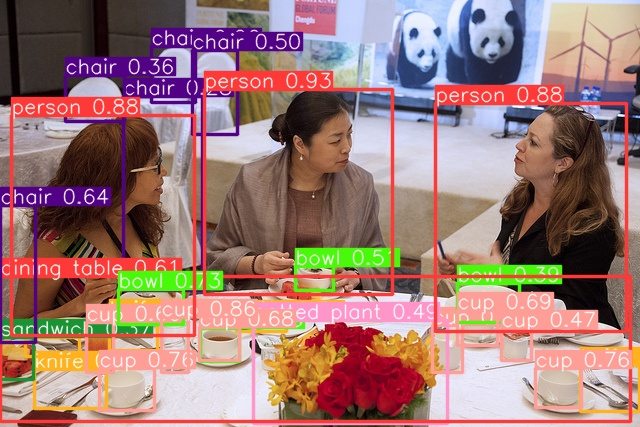

In [12]:
import os
from IPython.display import display, Image, Video

# Set the path to the folder
folder_path = "runs/detect/predict7/"

# List all files in the folder
files = os.listdir(folder_path)

# Display each image or video in the folder
for file in files:
    # Check if the file is an image or video
    if file.lower().endswith((".jpg", ".jpeg", ".png", ".avi", ".webp")):
        # Display the image or video
        file_path = os.path.join(folder_path, file)
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            display(Image(filename=file_path))
        elif file.lower().endswith(".avi"):
            display(Video(file_path))
        elif file.lower().endswith(".webp"):
            # Assuming the IPython library supports WebP format
            display(Image(filename=file_path, format='png'))


# Send the result to my email address tinlam@redhat.com

In [5]:
!pip install secure-smtplib


[notice] A new release of pip available: 22.2.2 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [10]:
import smtplib
from email.message import EmailMessage
import os

# Email Configuration
sender_email = 'timlam007@gmail.com'
sender_password = 'yfyw rktn gnmm rult'  # Replace with your actual password securely
receiver_email = 'tinlam@redhat.com'
smtp_server = 'smtp.gmail.com'
smtp_port = 465

def send_email_with_attachments(receiver, subject, body, files):
    msg = EmailMessage()
    msg['Subject'] = subject  # Ensure this is ASCII or properly encoded
    msg['From'] = sender_email
    msg['To'] = receiver
    msg.set_content(body)  # Ensure this is ASCII or properly encoded

    for file in files:
        print("Attaching file:", file)  # Print the file name
        with open(file, 'rb') as f:
            file_data = f.read()
            file_name = os.path.basename(f.name)
            # Encode the file name if it contains non-ASCII characters
            file_name = file_name.encode('utf-8').decode('ascii', 'ignore')
        msg.add_attachment(file_data, maintype='application', subtype='octet-stream', filename=file_name)

    with smtplib.SMTP_SSL(smtp_server, smtp_port) as smtp:
        smtp.login(sender_email, sender_password)
        smtp.send_message(msg)

# Set the path to the folder
folder_path = "runs/detect/predict4/"

# List all files in the folder
files = os.listdir(folder_path)

# Full paths of files to be attached
attachments = [os.path.join(folder_path, file) for file in files if file.lower().endswith((".jpg", ".jpeg", ".png", ".avi", ".webp"))]

# Send the email
send_email_with_attachments(receiver_email, 'YOLO Detection Results', 'Here are the detection results.', attachments)


Attaching file: runs/detect/predict4/object.jpg
